In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/indian_food.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
df.head(20)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


In [ ]:
#replacing -1 with 0, where ever -1 is a numerical type
df = df.replace(to_replace = -1, value = 0 )

In [ ]:
#we can see all the values that were -1 in prep_time and cook_time have been converted to 0
df[['prep_time', 'cook_time']]

,prep_time,cook_time
0,45,25
1,80,30
2,15,60
3,15,30
4,15,40
...,...,...
250,5,30
251,20,60
252,0,0
253,20,45


In [ ]:
# this will replace all the values -1 as strings
df['region'] = df['region'].str.replace('-1','not specified')
df['state'] = df['state'].str.replace('-1','not specified')
df['flavor_profile'] = df['flavor_profile'].str.replace('-1','not specified')

In [ ]:
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [ ]:
#we have one NaN value in region column we will convert it also to 'not specified'
df['region'].fillna('not specified', inplace=True)

In [ ]:
#let's again check the data for null values
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


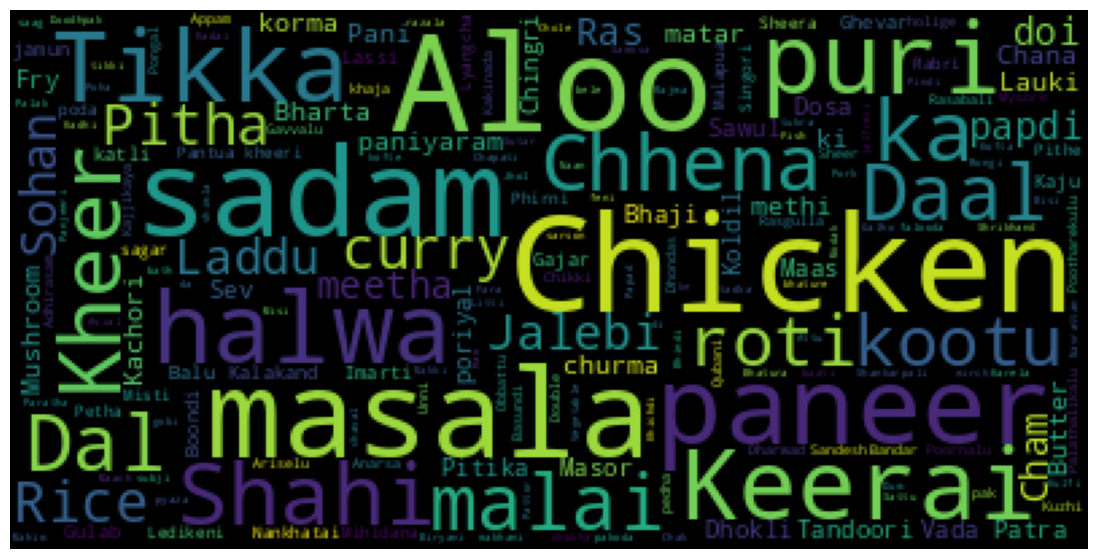

In [ ]:
from wordcloud import WordCloud
wordCloud = WordCloud(
    background_color='Black',
    max_font_size = 50).generate(' '.join(df['name']))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

#Correlation
correlation between cook time and prep time

In [ ]:
df.sort_values(by="prep_time", ascending=False).head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,not specified,main course,Kerala,South
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360,90,spicy,snack,not specified,South
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,not specified,South


In [ ]:
corr_matrix = df.corr()
# Print the correlation matrix
print(corr_matrix)

           prep_time  cook_time
prep_time   1.000000   0.142407
cook_time   0.142407   1.000000


<ipython-input-149-2d3ed51bd467>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
x = df['prep_time']
y = df['cook_time']

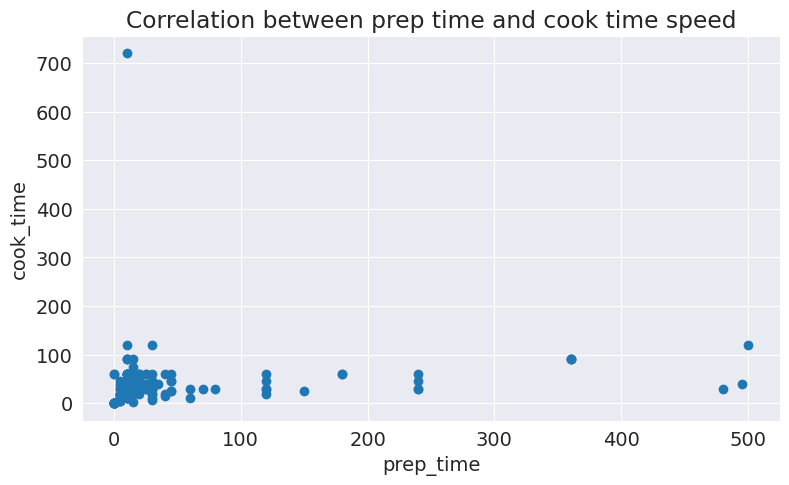

In [ ]:
plt.scatter(x, y)
plt.xlabel('prep_time')
plt.ylabel('cook_time')
plt.title('Correlation between prep time and cook time speed')
plt.show()

<ipython-input-152-a415e0e9dc3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


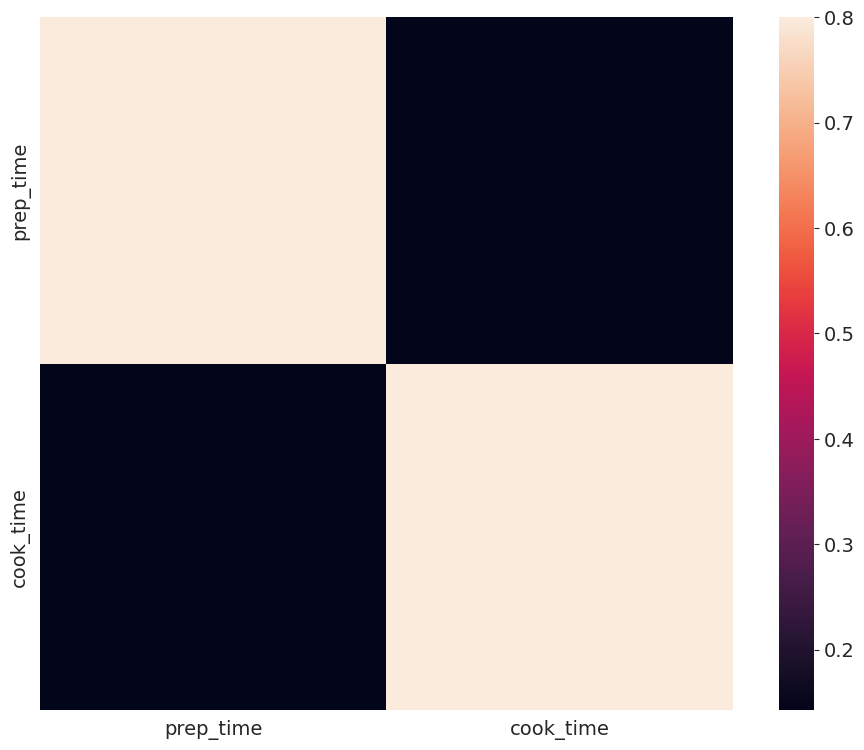

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

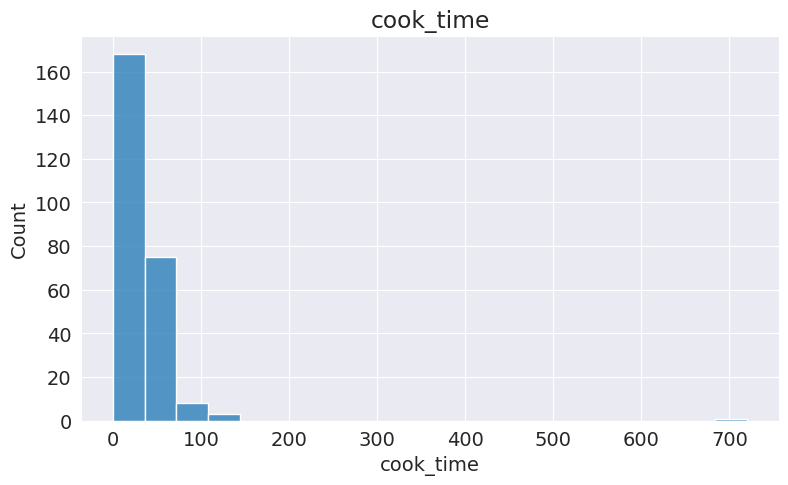

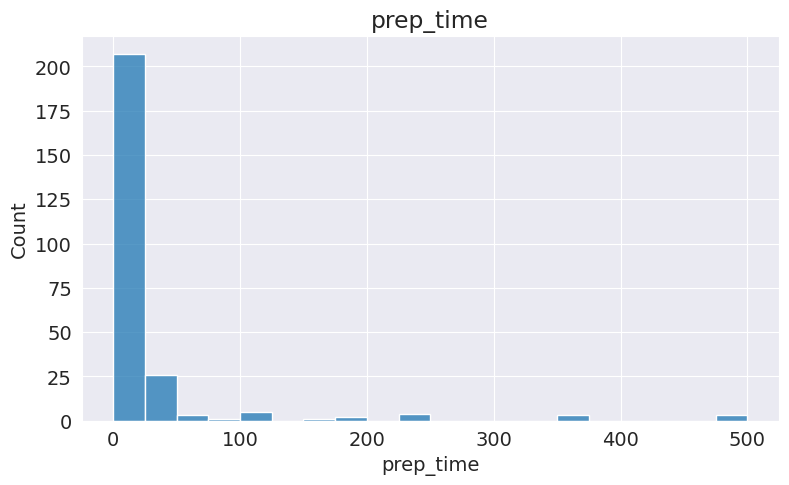

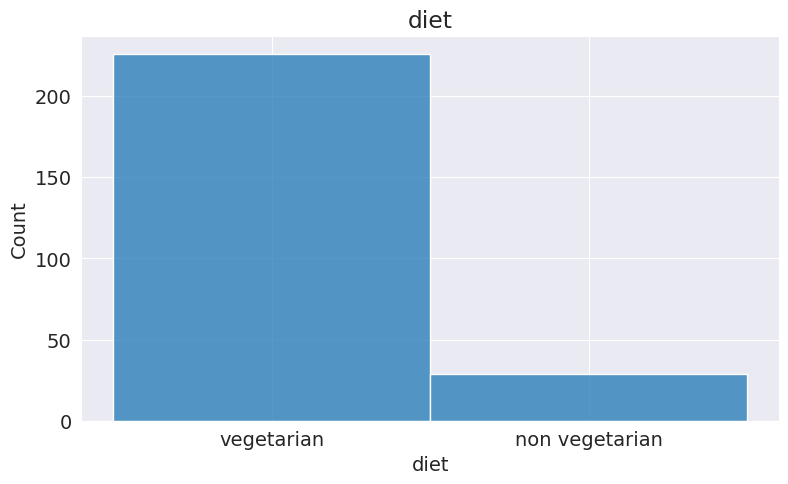

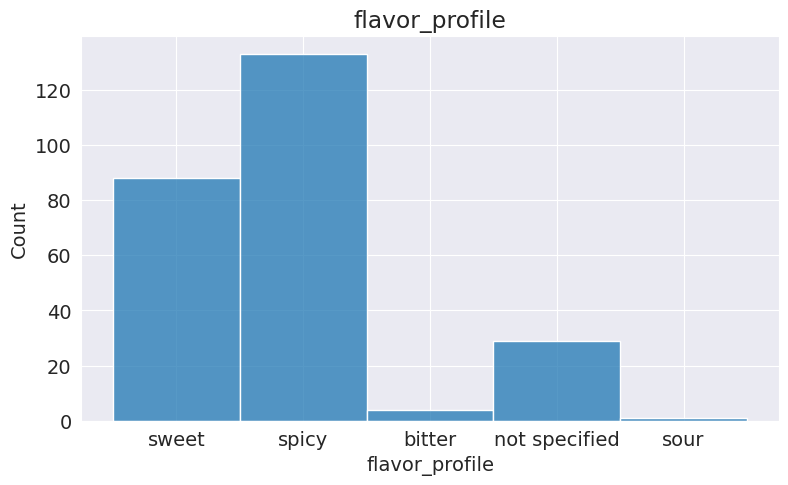

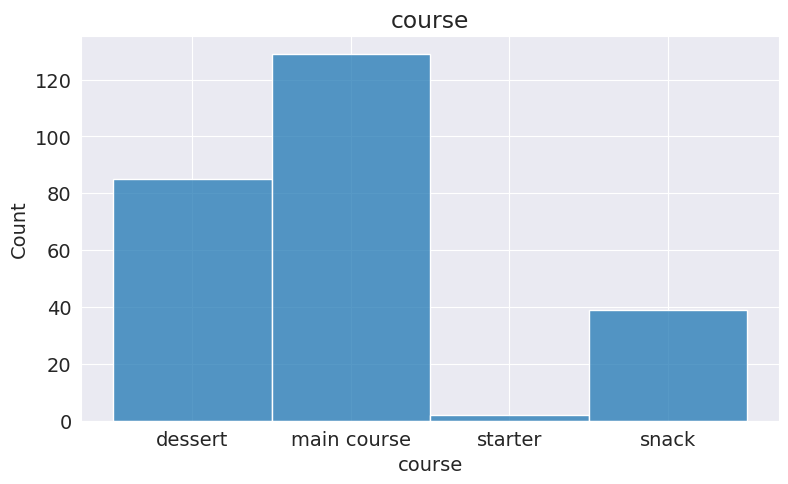

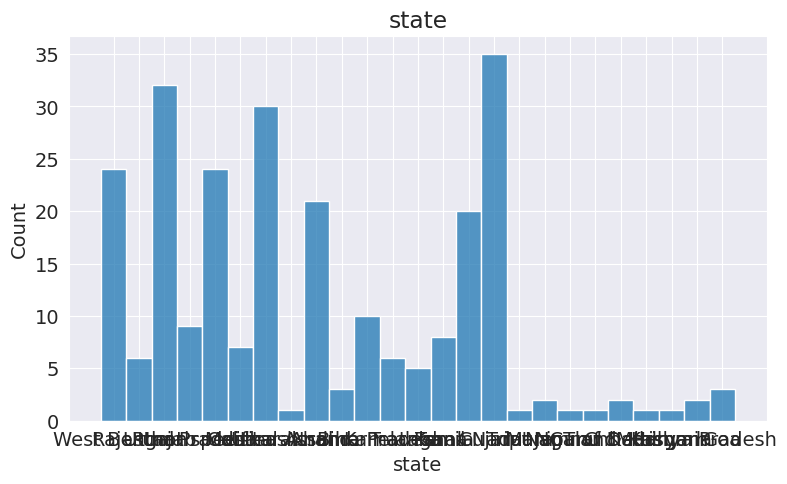

In [ ]:
interesting_columns = ['cook_time', 'prep_time', 'diet', 'flavor_profile','course','state']
for col in interesting_columns:
    sns.histplot(x=col, data=df, bins=20)
    plt.title(col)
    plt.show()

    print('\n')

count    255.000000
mean      34.639216
std       48.185452
min        0.000000
25%       20.000000
50%       30.000000
75%       40.000000
max      720.000000
Name: cook_time, dtype: float64


<ipython-input-154-80ec1154174f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cook_time'], color='g', bins=100, hist_kws={'alpha': 0.4});


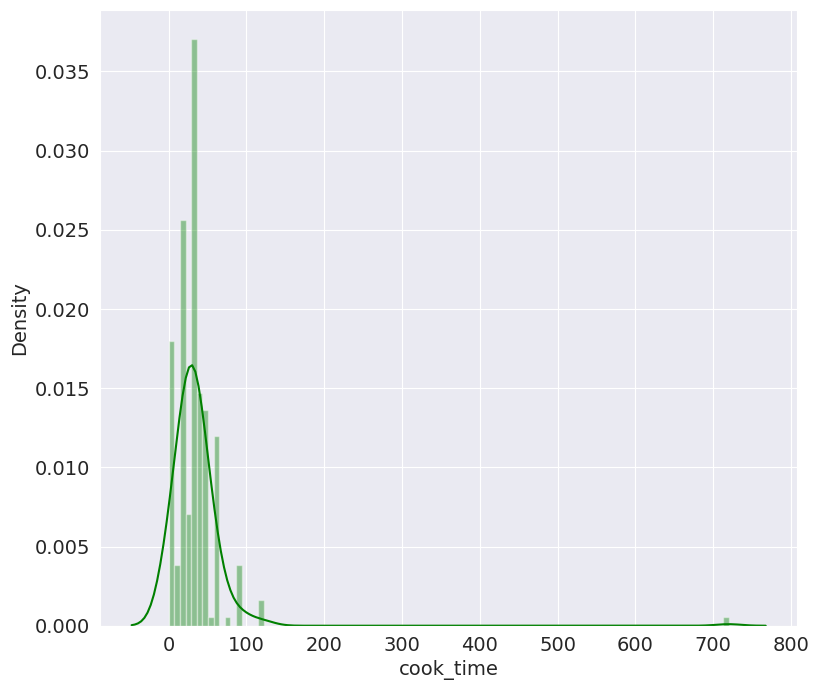

In [ ]:
print(df['cook_time'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['cook_time'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()


,prep_time,cook_time
0,45,25
1,80,30
2,15,60
3,15,30
4,15,40


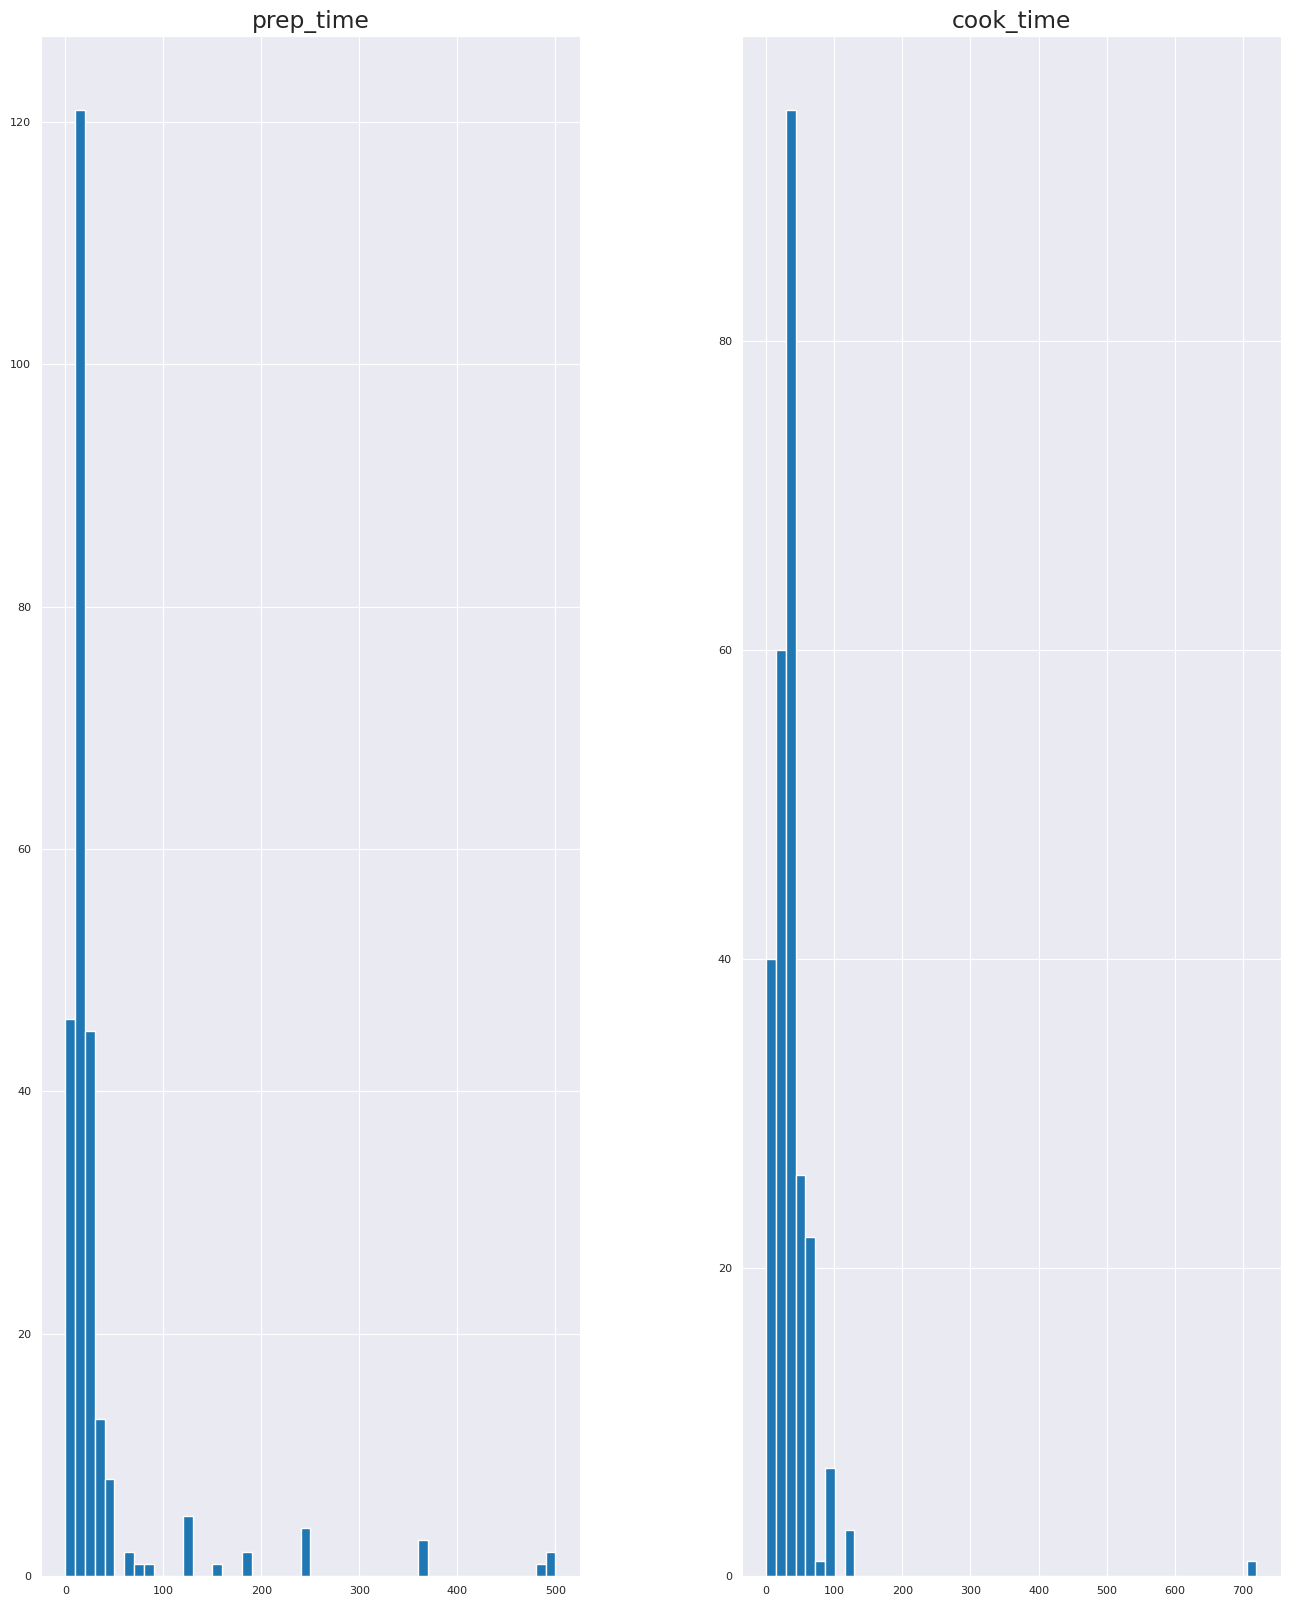

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


## 1. Is indian food primarily Vegetarian or Non Vegetarian?

We plotted a bar chart to compare vegetarian vs non vegetarian food items.

In [ ]:
#counting vegetarian and non vegetarian dishes for bar chart
veg_nonveg = df.diet.value_counts()
veg_nonveg

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

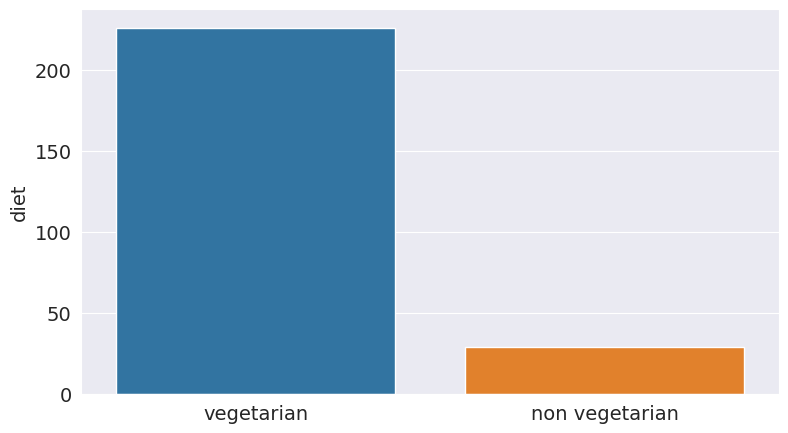

In [ ]:
sns.barplot(x = veg_nonveg.index, y = veg_nonveg);

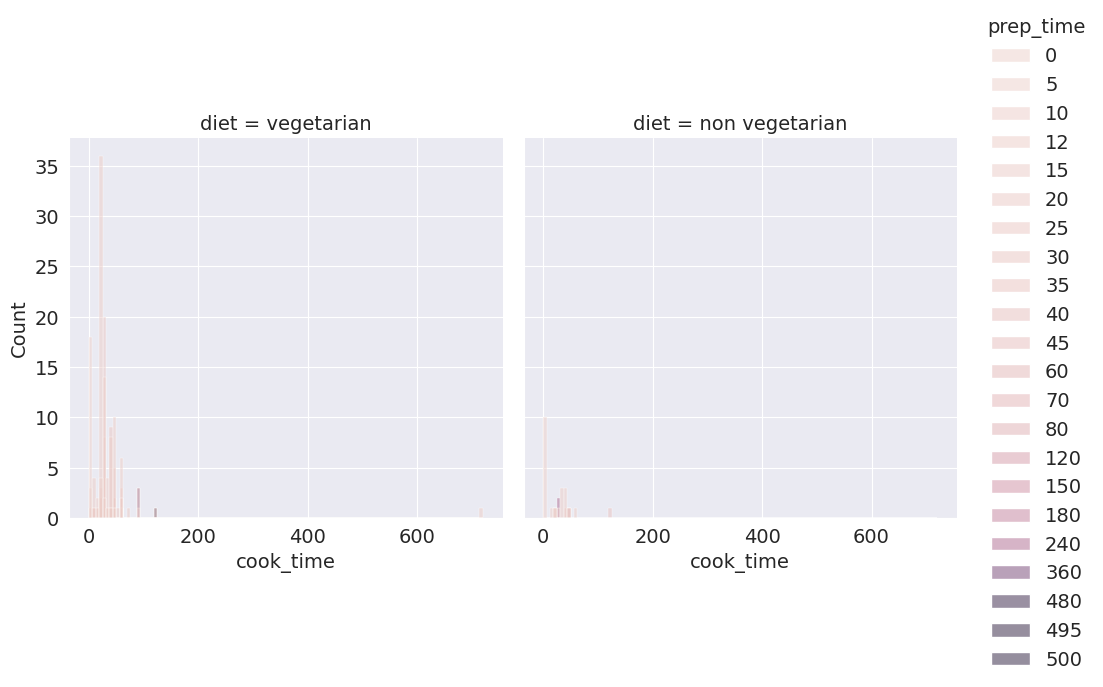

In [ ]:
#time taken to cook diet wise
sns.displot(x='cook_time', hue='prep_time', col='diet', data=df)
plt.show()

## Conclusion

Indian food is primarily Vegetarian.

## 2. Which region has the most variety of food in India?

I plotted a pie chart to find the answer.

In [ ]:
#counting region wise dishes
region_values = df.region.value_counts()

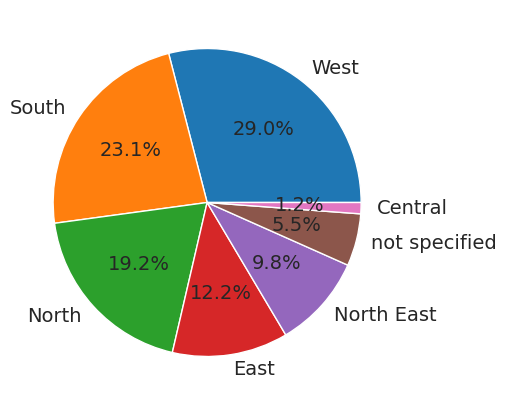

In [ ]:
plt.pie(region_values, labels = region_values.index, autopct='%1.1f%%');

## Conclusion

West region of India has most variety of dishes in dataset.

## 3. Top 10 dishes which takes most time to prepare.

Firstly, I added a new column to calculated total_time = prep_time + cook_time. And then used sort_values to find the most time consuming dishes.

In [ ]:
df['total_time'] = df['prep_time']+ df['cook_time']
df['total_time']

0       70
1      110
2       75
3       45
4       55
      ... 
250     35
251     80
252      0
253     65
254      0
Name: total_time, Length: 255, dtype: int64

In [ ]:
df.sort_values('total_time', ascending = False).head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West,730
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North,620
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,not specified,main course,Kerala,South,535
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East,510
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360,90,spicy,snack,not specified,South,450
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360,90,spicy,snack,not specified,South,450
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,not specified,South,450
48,Poornalu,"Chana dal, jaggery",vegetarian,240,60,sweet,dessert,Andhra Pradesh,South,300
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240,45,sweet,dessert,Manipur,North East,285
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240,30,spicy,main course,Punjab,North,270


**Conclusion**
As we can see Shrikhand takes most time and given above dishes takes most time to prepare out of all the given dishes.

## 4. Which dish requires the most number of ingredients to make?

I first added a column which converted the ingredients into a list and then I added another column which calculates the length of the corresponding ingredients list.

In [ ]:
df['ing_list'] = df['ingredients'].apply(lambda x: x.split(', '))
df['ing_list']

0                      [Maida flour, yogurt, oil, sugar]
1                              [Gram flour, ghee, sugar]
2         [Carrots, milk, sugar, ghee, cashews, raisins]
3      [Flour, ghee, kewra, milk, clarified butter, s...
4      [Milk powder, plain flour, baking powder, ghee...
                             ...                        
250            [Glutinous rice, black sesame seeds, gur]
251    [Coconut milk, egg yolks, clarified butter, al...
252    [Cottage cheese, dry dates, dried rose petals,...
253    [Milk powder, dry fruits, arrowroot powder, al...
254    [Brown rice, fennel seeds, grated coconut, bla...
Name: ing_list, Length: 255, dtype: object

In [ ]:
df['no_of_ing']= df.ing_list.str.len()
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,ing_list,no_of_ing
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70,"[Maida flour, yogurt, oil, sugar]",4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110,"[Gram flour, ghee, sugar]",3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75,"[Carrots, milk, sugar, ghee, cashews, raisins]",6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45,"[Flour, ghee, kewra, milk, clarified butter, s...",10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55,"[Milk powder, plain flour, baking powder, ghee...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East,35,"[Glutinous rice, black sesame seeds, gur]",3
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West,80,"[Coconut milk, egg yolks, clarified butter, al...",4
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,0,0,sweet,dessert,Jammu & Kashmir,North,0,"[Cottage cheese, dry dates, dried rose petals,...",5
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,65,"[Milk powder, dry fruits, arrowroot powder, al...",4


In [ ]:
df.sort_values('no_of_ing', ascending = False).head(1)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,ing_list,no_of_ing
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45,"[Flour, ghee, kewra, milk, clarified butter, s...",10


## Conclusion

Ghevar requires most no. of ingredients than other dishes

## 5. Comparing cook time and prep time of dishes using scatter plot?

Using a scatter plot to generate a valuable insight between prep time and cook time.

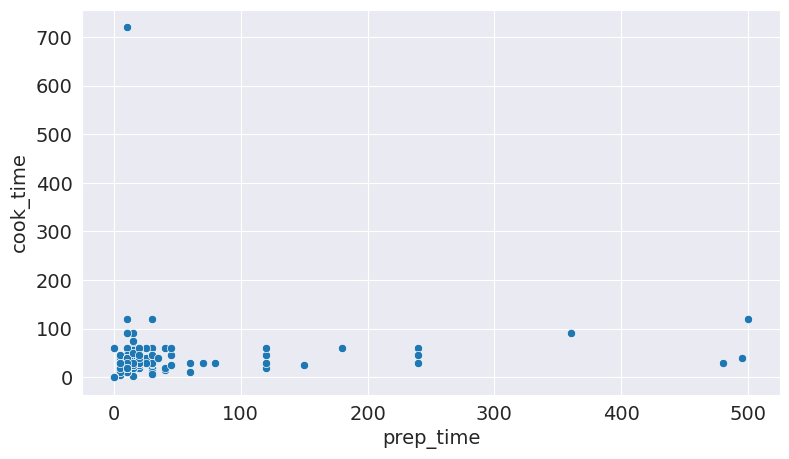

In [ ]:
sns.scatterplot(x = df.prep_time, y = df.cook_time);

## Conclusion

1. Most dishes' cooktime is less then 150 mins with one exception which takes more than 700 minutes to cook.
2. whereas preptime has high variability

## 6. Which flavor profile food takes usually maximum time to prepare?

Using line chart to see that on average which type of food will take most time to prepare.

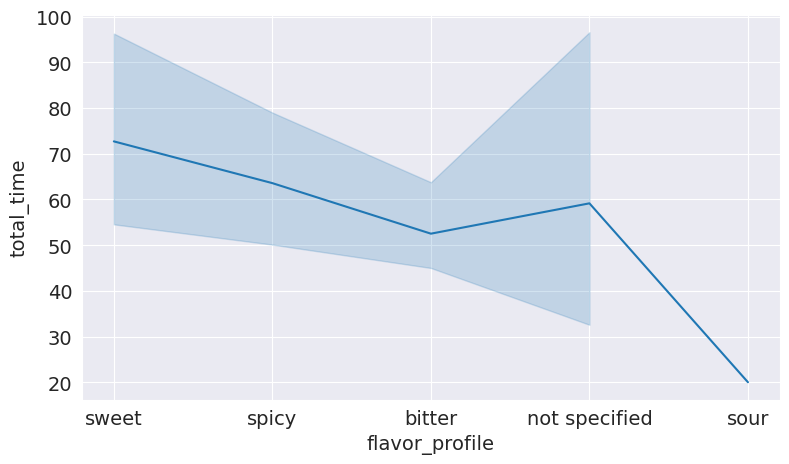

In [ ]:
sns.lineplot(x='flavor_profile', y='total_time', data=df);

## Conclusion
On average the desserts or sweet foods are the most time consuming foods to prepare.

## 7. Flavor wise breakdown of food items using piechart.

In [ ]:
flavor_values = df.flavor_profile.value_counts()

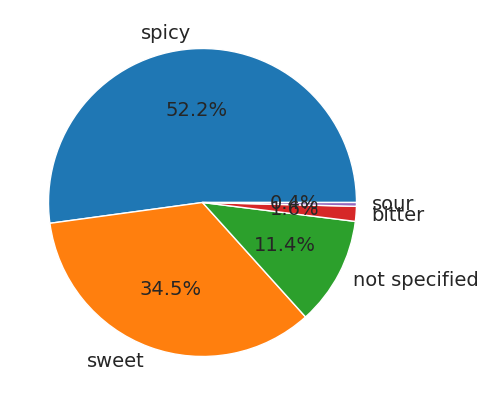

In [ ]:
plt.pie(flavor_values, labels = flavor_values.index, autopct='%1.1f%%');

## Conclusion

Indian foods are majorily spicy.

## 8. What meal(main course, starter etc.) is the Indian food considered primarily?

In [ ]:
course_values = df.course.value_counts()

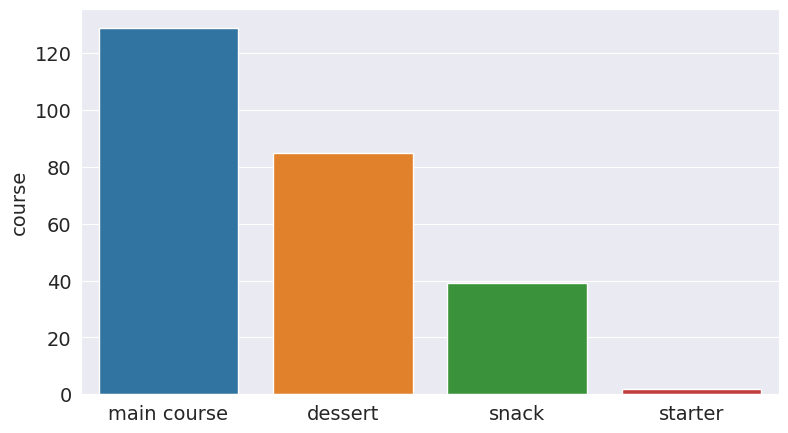

In [ ]:
sns.barplot(x = course_values.index, y = course_values);

## Conclusion

Indian food is mostly a main course meal, followed by dessert.

# **Decision Tree**

In [ ]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,ing_list,no_of_ing
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70,"[Maida flour, yogurt, oil, sugar]",4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110,"[Gram flour, ghee, sugar]",3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75,"[Carrots, milk, sugar, ghee, cashews, raisins]",6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45,"[Flour, ghee, kewra, milk, clarified butter, s...",10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55,"[Milk powder, plain flour, baking powder, ghee...",8


In [ ]:
df1=df[['prep_time','cook_time','name','flavor_profile','diet']]
df1.head()

,prep_time,cook_time,name,flavor_profile,diet
0,45,25,Balu shahi,sweet,vegetarian
1,80,30,Boondi,sweet,vegetarian
2,15,60,Gajar ka halwa,sweet,vegetarian
3,15,30,Ghevar,sweet,vegetarian
4,15,40,Gulab jamun,sweet,vegetarian


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
df1=df1.apply(LabelEncoder().fit_transform)

In [ ]:
df1.head()

,prep_time,cook_time,name,flavor_profile,diet
0,10,7,13,4,1
1,13,8,27,4,1
2,4,14,71,4,1
3,4,8,76,4,1
4,4,10,80,4,1


In [ ]:
df2 = df1.reindex(columns=['prep_time','cook_time','name','diet','flavor_profile'])
df2.head()

,prep_time,cook_time,name,diet,flavor_profile
0,10,7,13,1,4
1,13,8,27,1,4
2,4,14,71,1,4
3,4,8,76,1,4
4,4,10,80,1,4


In [ ]:
X=df2.iloc[:,:-1]
feature_cols=['prep_time','cook_time','name','diet']
Y=df2.iloc[:,4].values

In [ ]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='best')
X
regressor.fit(X,Y)

X_in=np.array([2,0,1,1])
y_pred=regressor.predict([X_in])
print("Prediction: ",y_pred)

Prediction:  [3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
X_inn=X_in.reshape(1,-1)

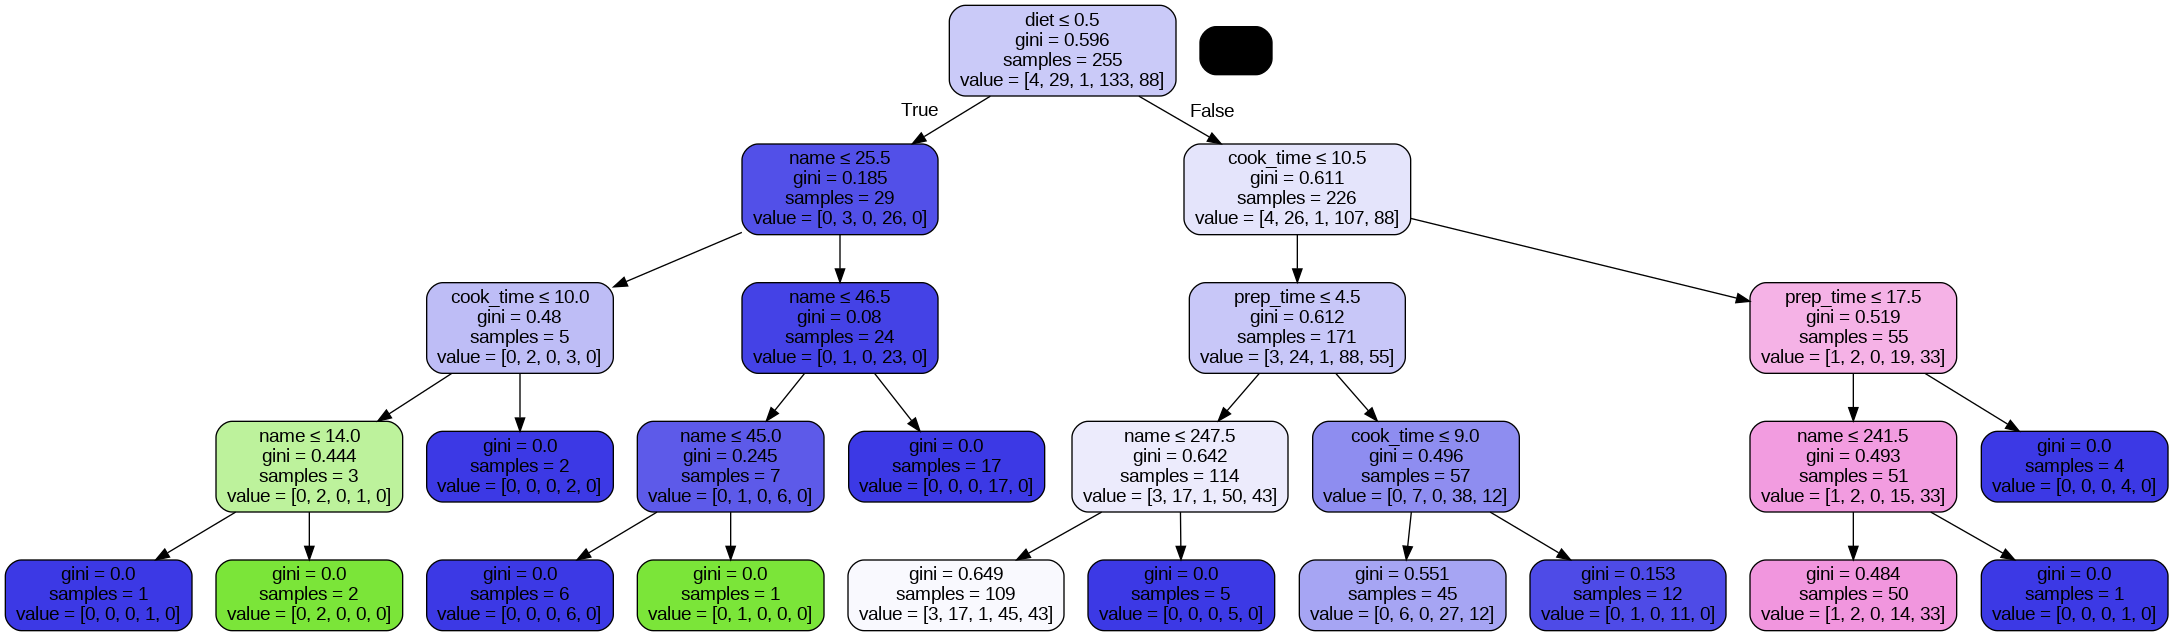

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=StringIO()
feature_cols=['prep_time','cook_time','name','diet']
export_graphviz(regressor,out_file=dot_data, filled=True,rounded=True,special_characters=True, feature_names = feature_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Decisiontree.png")
Image(graph.create_png())

In [ ]:
accuracy = regressor.score(X_inn, y_pred)
print(f'The accuracy of the decision tree classifier is: {accuracy:.2f}')

The accuracy of the decision tree classifier is: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
